<a href="https://colab.research.google.com/github/hlsvalle/data-science/blob/master/Analisando_os_Dados_Airbnb_Barcelona.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analise dos Dados do Airbnb - Barcelona

De acordo com o Wikipédia o [Airbnb](https://www.airbnb.com.br/) é considerado um serviço online comunitário para as pessoas anunciarem, descobrirem e reservarem acomodações e meios de hospedagem.

O Airbnb permite ao individuo alugar toda ou partes de sua casa, como forma de uma acomodação extra.

A empresa foi fundada em Agosto de 2008 por Brian Chesky, Joe Gebbia e Nathan Blecharczyk em São Francisco, na Califórnia.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg">

**Neste *notebook*, vamos analisar os dados referentes à cidade de Barcelona na Espanha, e verificar quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

Os dados utilizados para este projeto, foi extraido do site [inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para analise inicial utilizaremos o seguinte arquivo referente a Barcelona:

*   Listings.csv






In [0]:
#importar os pacotes necessarios

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [0]:
# Importar o arquivo listings.csv para um DataFrame

df = pd.read_csv('http://data.insideairbnb.com/spain/catalonia/barcelona/2019-11-09/visualisations/listings.csv')

## Análise dos Dados

Neste processo, é possivel demonstrar um entendimento inicial de como os dados estão estruturados.

**Dicionário de Dados**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - Região do Bairro
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Na linha abaixo é possivel verificar as 5 primeira linhas do nosso *dataset*;

In [3]:
# Mostrar as 5 primeiras linhas do DataFrame
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,18666,Flat with Sunny Terrace,71615,Mireia And Maria,Sant Martí,el Camp de l'Arpa del Clot,41.40889,2.18555,Entire home/apt,130,3,1,2015-10-10,0.02,30,304
1,18674,Huge flat for 8 people close to Sagrada Familia,71615,Mireia And Maria,Eixample,la Sagrada Família,41.40420,2.17306,Entire home/apt,60,1,20,2019-10-19,0.25,30,312
2,23197,FORUM DELUXE 5 MINS WALK CCIB CENTER & SEA!,90417,Etain (Marnie),Sant Martí,el Besòs i el Maresme,41.41203,2.22114,Entire home/apt,210,3,51,2019-09-29,0.48,2,359
3,25786,NICE ROOM AVAILABLE IN THE HEART OF GRACIA,108310,Pedro,Gràcia,la Vila de Gràcia,41.40145,2.15645,Private room,32,1,268,2019-11-06,2.38,1,46
4,31958,"Gaudi Attic 1, Friendly Rentals",136853,Fidelio,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.40950,2.15938,Entire home/apt,60,1,182,2019-10-16,1.71,39,324


### **Questão 1 - Quantos atributos (variaveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variaveis?**

Abaixo verificaremos quantas variaveis existem no nosso *dataset* e quais os tipos de dados de entrada.

In [4]:
#Identificar o volume de dados do DataFrame
print("Variaveis:\t {}".format(df.shape[0]))
print("Entradas:\t {}\n".format(df.shape[1]))

#Listar as 5 primeiras entradas do Dataset
display(df.dtypes)

Variaveis:	 20428
Entradas:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

###Questão 2 - Qual a porcentagem de valores ausentes no dataset

A qualidade de um *dataset* esta relacionada a quantidade de valores ausentes. É importante entender se esses valores ausentes são significativos em relação aos valores de entrada;

Podemos perceber abaixo que:

* neighbourhood_group 100% dos valores ausentes
* reviews_per_month e last_review apresentam quase 13% das linhas ausentes



In [5]:
#Ordenar em ordem decrescente os valores ausentes
(df.isnull().sum() / df.shape[0] * 100).sort_values(ascending=False)

reviews_per_month                 20.932054
last_review                       20.932054
host_name                          0.083219
name                               0.073429
availability_365                   0.000000
calculated_host_listings_count     0.000000
number_of_reviews                  0.000000
minimum_nights                     0.000000
price                              0.000000
room_type                          0.000000
longitude                          0.000000
latitude                           0.000000
neighbourhood                      0.000000
neighbourhood_group                0.000000
host_id                            0.000000
id                                 0.000000
dtype: float64

### Questão 3 - Qual o tipo de distribuição das variaveis

Para mostrar os tipos de distribuição iremos plotar nos histogramas abaixo:


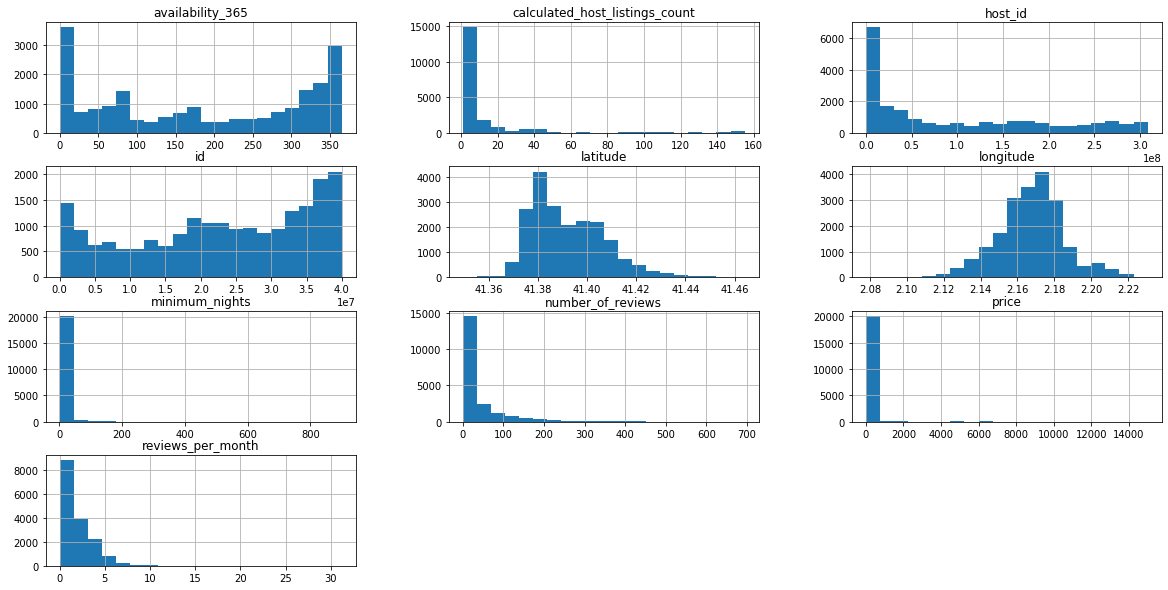

In [6]:
#Plotar os histogramas variaveis numéricas
df.hist(bins=20, figsize=(20,10));

### Existem oultliers presente?

É possivel pela distribuição do histograma perceber a presença de outliers. Nas variaveis price, minimum_nights, number_of_reviews;
Os valores não seguem uma distribuição, distorcendo assim todo o grafico;
Existem duas formas rápidas de demonstrar a presença de outliers;

* Resumo estatistico utilizando a função `describe()`
* E plotar `boxplots` para as variaveis


In [7]:
#Resumo estatistico das variaveis
df[['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count
count,20428.000000,20428.000000,20428.00000,16152.000000,20428.000000
mean,134.587429,8.736244,36.27335,1.861225,14.716370
std,478.968270,18.702046,62.75757,1.766933,30.366928
min,0.000000,1.000000,0.00000,0.010000,1.000000
25%,39.000000,1.000000,1.00000,0.440000,1.000000
50%,60.000000,2.000000,9.00000,1.320000,2.000000
75%,105.000000,4.000000,43.00000,2.860000,11.000000
max,15000.000000,900.000000,694.00000,31.210000,155.000000


Observando rapidamente o resumo estatistico, podemos confirmar algumas hipoteses:

* Em 75 % dos preços (price) o valor esta abaixo de 105, porem o valor máximo é de 15000;
* A quantidade minima de noites ultrapassa o limite real de 365 dias.
* Podemos tambem observar que em 75% das visualizações por mês esta abaixo de 2.86 , enquanto a quantidade de visualizações máxima é de 31.21, havendo assim uma distorção na distribuição dos valores;

###Boxplot para Minimum Nights

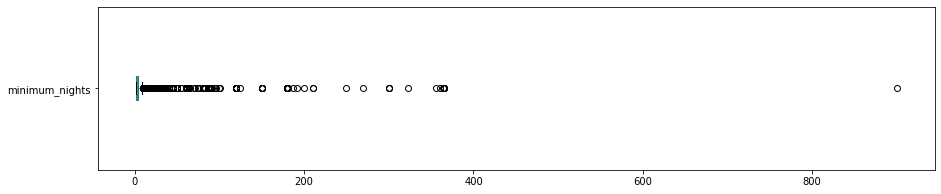

Minimum Nights acima de 30 dias:
3142 entradas
15.3808%


In [8]:
#Minimum_Nights
df.minimum_nights.plot(kind='box',vert=False, figsize=(15,3))
plt.show()

#Minimum_Nights acima de 30 dias
print("Minimum Nights acima de 30 dias:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30])) / df.shape[0] * 100))

###Bloxplot para Price



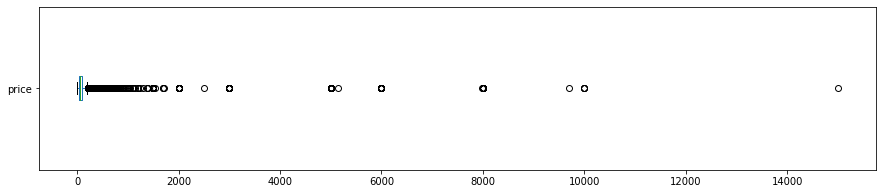


Price : Valores acima de 1500:
152 entradas: 
0.7441% 


In [9]:
#Price
df.price.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

#Price acima de 1500
print("\nPrice : Valores acima de 1500:")
print("{} entradas: ".format(len(df[df.price > 1500])))
print("{:.4f}% ".format((len(df[df.price > 1500])) / df.shape[0] * 100))

### Histogramas sem a presença de Outliers

Com os BoxPlots acima podemos observar a presença de Outliers nas variaveis Price e Minimun_Nights onde houve uma distorção das distribuições dos valores;

Abaixo vamos plotar novamente os histogramas sem a presença dos Outliers em um novo `dataset`;

In [0]:
#Removendo os *outliers* em um novo dataset
df_clean = df.copy() #copiando um dataframe para um novo
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f73ed0c99e8>,
      dtype=object)

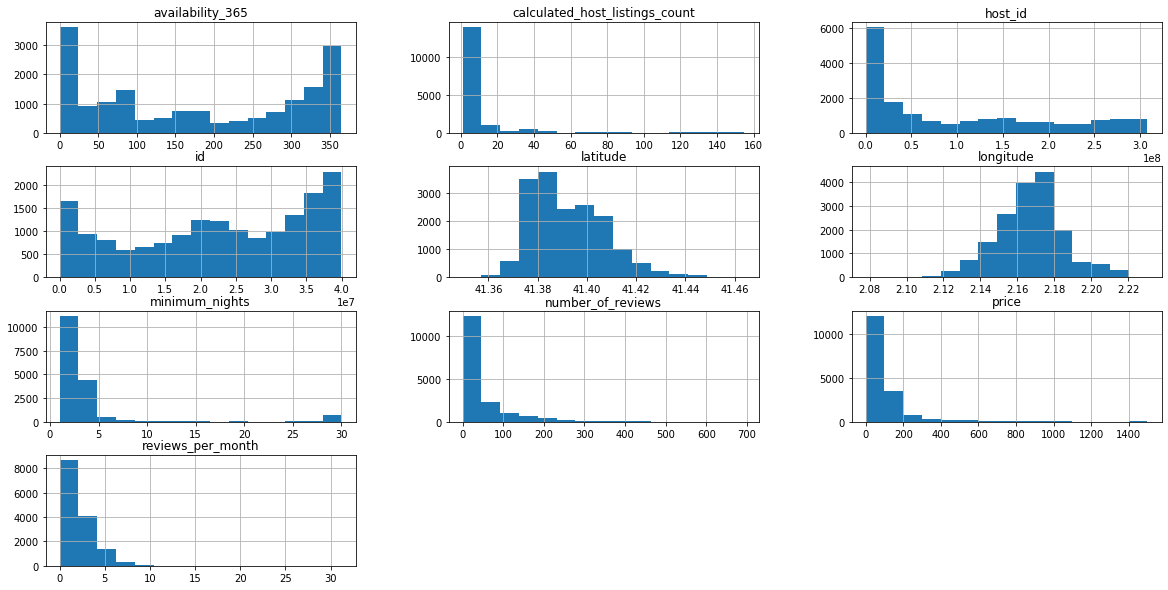

In [11]:
#Plotando um novo histograma sem a presença dos Outliers
df_clean.hist(bins=15, figsize=(20,10))

### Qual a correlação entre as variaveis?

Correlação é uma ligação entre duas coisas, no nosso caso, vamos encontrar a correlação entre duas variaveis;

Existem algumas formas de mostrar a intensidade de correlação entre duas variaveis, para isso vamos:

* Criar uma Matriz de Correlação
* Gerar um `heatmap` a partir dessa Matriz, utilizando a biblioteca `seaborn`;


In [12]:
#Criando uma Matriz de Correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.053506,-0.037177,-0.102324,0.247710,0.221537
minimum_nights,-0.053506,1.000000,-0.106715,-0.167083,-0.084925,0.019280
number_of_reviews,-0.037177,-0.106715,1.000000,0.475982,-0.084096,0.098540
reviews_per_month,-0.102324,-0.167083,0.475982,1.000000,-0.163440,0.004535
calculated_host_listings_count,0.247710,-0.084925,-0.084096,-0.163440,1.000000,0.221384
availability_365,0.221537,0.019280,0.098540,0.004535,0.221384,1.000000


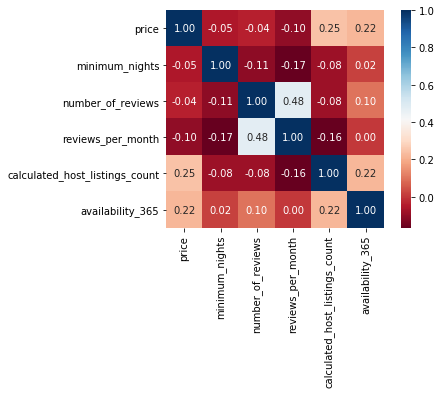

In [13]:
#Plotando a Matriz através do HeatMap
sns.heatmap(corr,cmap='RdBu',fmt='.2f',square=True, linecolor='white', annot=True);

### Qual o tipo de imóvel mais alugado em Barcelona

Existem varios tipos de imóveis disponiveis no Airbnb, é possivel descobrirmos a quantidade de cada tipo através da variavel `room_type`;

Para isso vamos utilizar o método `value_counts()`;

In [14]:
#Contando a quantidade de tipos de aluguel
df_clean.room_type.value_counts()

Private room       9779
Entire home/apt    6700
Hotel room          535
Shared room         151
Name: room_type, dtype: int64

In [15]:
#Mostrando a porcentagem por tipo de imovel
df_clean.room_type.value_counts() / df.shape[0] * 100

Private room       47.870570
Entire home/apt    32.798120
Hotel room          2.618954
Shared room         0.739182
Name: room_type, dtype: float64

* Podemos observar acima que **47%** dos imóveis disponiveis em Barcelona, são quartos privativos;

### Qual a localidade mais cara de Barcelona para se hospedar?

Para agruparmos e mostrarmos o lugar mais caro podemos usar a função `grouby()` e ordenarmos por decrescente, conforme abaixo:

In [16]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Diagonal Mar i el Front Marítim del Poblenou    201.961749
la Vila Olímpica del Poblenou                   184.231214
la Dreta de l'Eixample                          178.260748
les Tres Torres                                 161.931034
el Camp de l'Arpa del Clot                      131.758958
la Vila de Gràcia                               130.279871
Vallvidrera, el Tibidabo i les Planes           124.400000
l'Antiga Esquerra de l'Eixample                 114.458378
el Poblenou                                     108.698765
el Putxet i el Farró                            108.175532
Name: price, dtype: float64

Observamos acima que Diagonal Mar i el Front Marítm del Poblenou é um dos lugares mais caros de Barcelona, onde a média de preço é de **201.96**;

Diagonal Mar i el Front Marítim del Poblenou é um bairro da cidade de Barcelona, Espanha, situado no distrito de Sant Martí. É um dos bairros mais novos da cidade condal e foi desenhado e criado por plano urbanístico que se realizou para a celebração do Fórum Universal de les Cultures de Barcelona, em 2004. Atualmente ainda está em fase de desenvolvimento. [Wikipédia](https://pt.wikipedia.org/wiki/Diagonal_Mar_i_el_Front_Mar%C3%ADtim_del_Poblenou)


### Qual a localidade mais em conta de Barcelona para se hospedar?

In [17]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=True)[:10]

neighbourhood
Can Peguera          22.500000
Baró de Viver        25.000000
Montbau              26.578947
la Trinitat Nova     29.200000
la Trinitat Vella    29.500000
Ciutat Meridiana     32.142857
la Prosperitat       34.250000
Verdun               36.464286
el Bon Pastor        37.176471
la Teixonera         37.793103
Name: price, dtype: float64

Conseguimos através da longitude e latitude plotar os lugares de Barcelona, conforme abaixo:

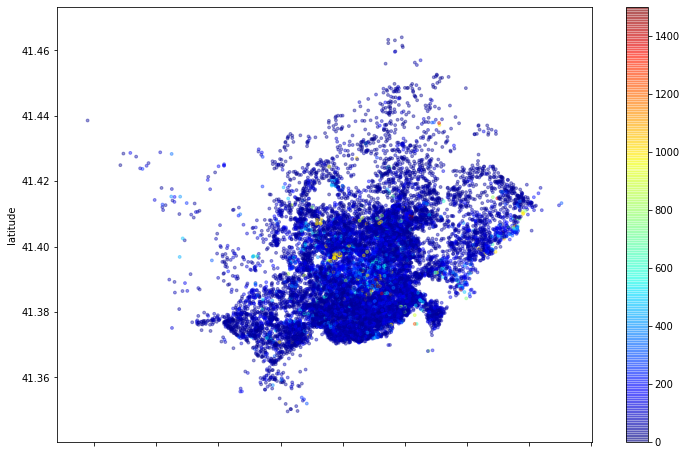

In [0]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

# Conclusão

Observamos a presença de Outliers o que é necessário trabalhar, para que não se tenha conclusões distorcidas sobre os dados;

Com esses dados podemos extrair algumas informações valiosas sobre Barcelona, onde em breve irei trabalhar alguns outros datasets mais robusto.